In [ ]:
!pip install imagehash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 296 kB 4.9 MB/s 


In [ ]:
from PIL import Image
import imagehash

# Одинаковые картинки

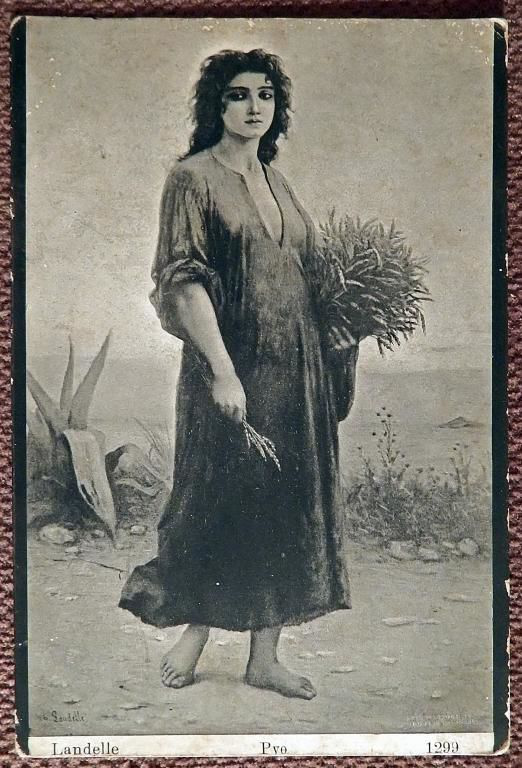

In [ ]:
front1 = Image.open('1_1.jpg')
front1

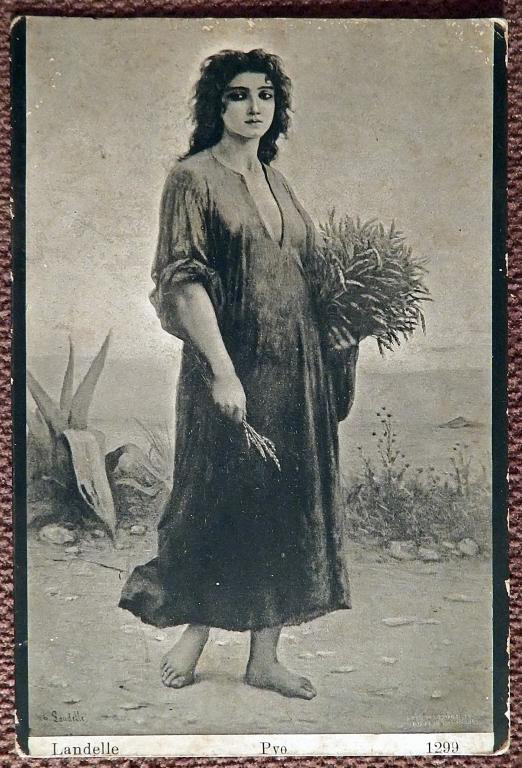

In [ ]:
front2 = Image.open('2_1.jpg')
front2

In [ ]:
front1_hash = imagehash.dhash(front1)
print(front1_hash)

ca9c9a86ce8e8ce8


In [ ]:
front2_hash = imagehash.dhash(front2)
print(front2_hash)

ca9c9a86ce8e8ce8


In [ ]:
back1 = Image.open('1_2.jpg')
back2 = Image.open('2_2.jpg')

back1_hash = imagehash.dhash(back1)
back2_hash = imagehash.dhash(back2)

print(back1_hash)
print(back2_hash)

dcfcfcfff37bfede
dcfcfcfff37bfede


In [ ]:
print(back1_hash - back2_hash)  # hamming distance

0


# Полоска снизу

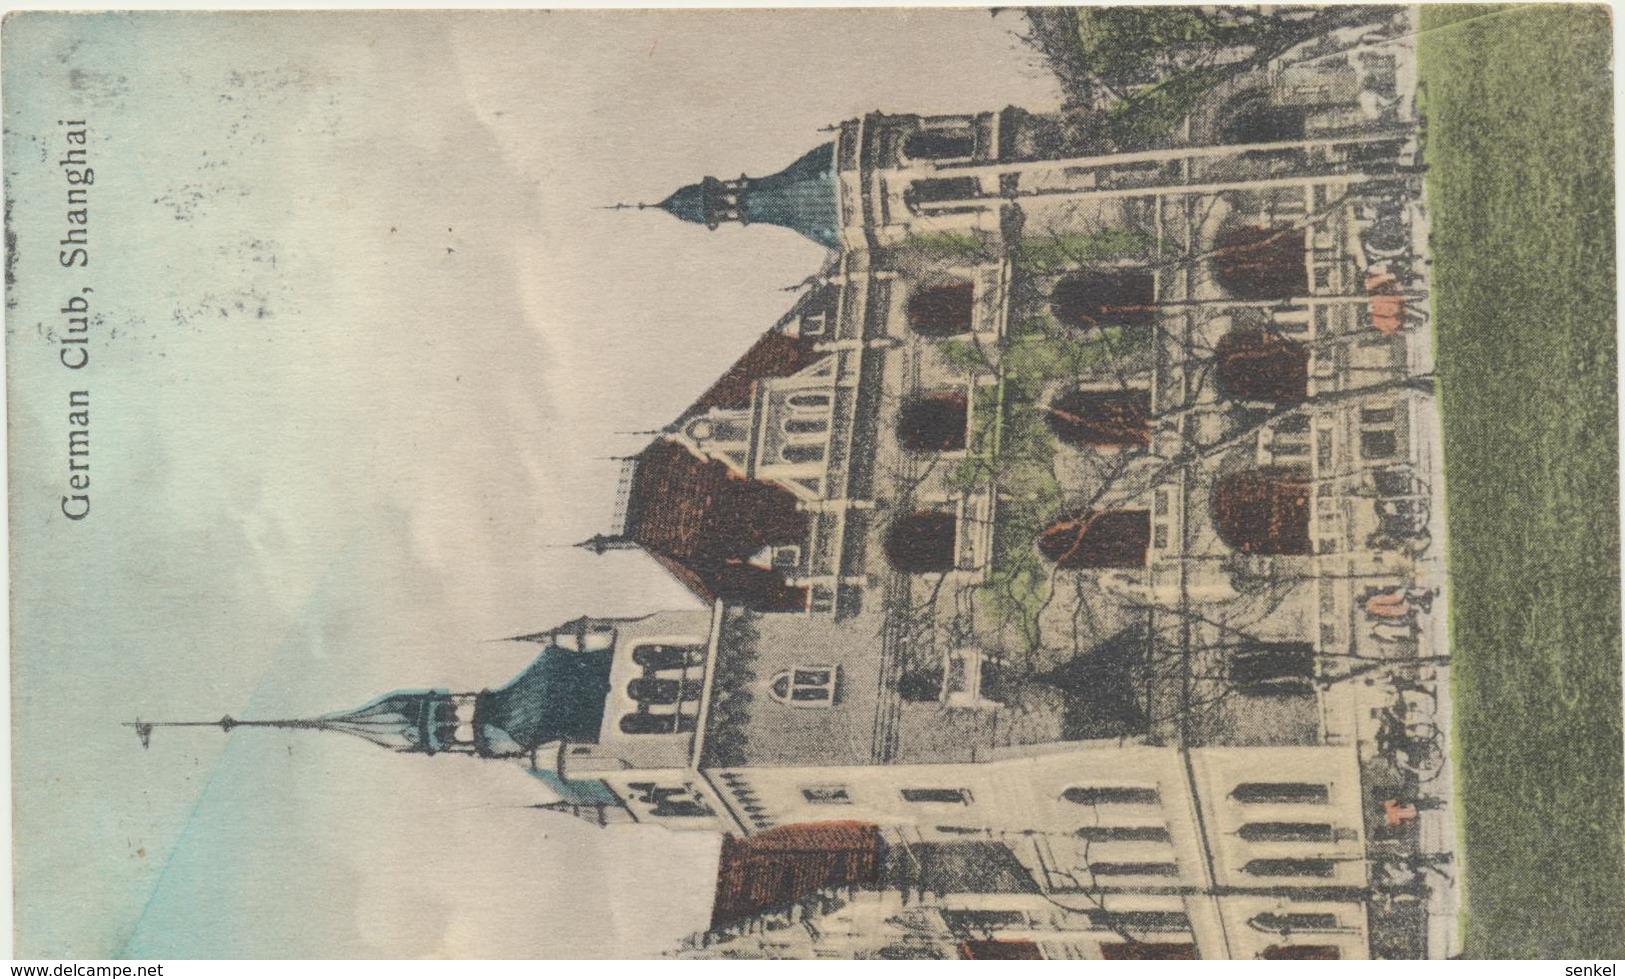

In [ ]:
front1 = Image.open('/content/Delcampe-6273.jpg')
front1

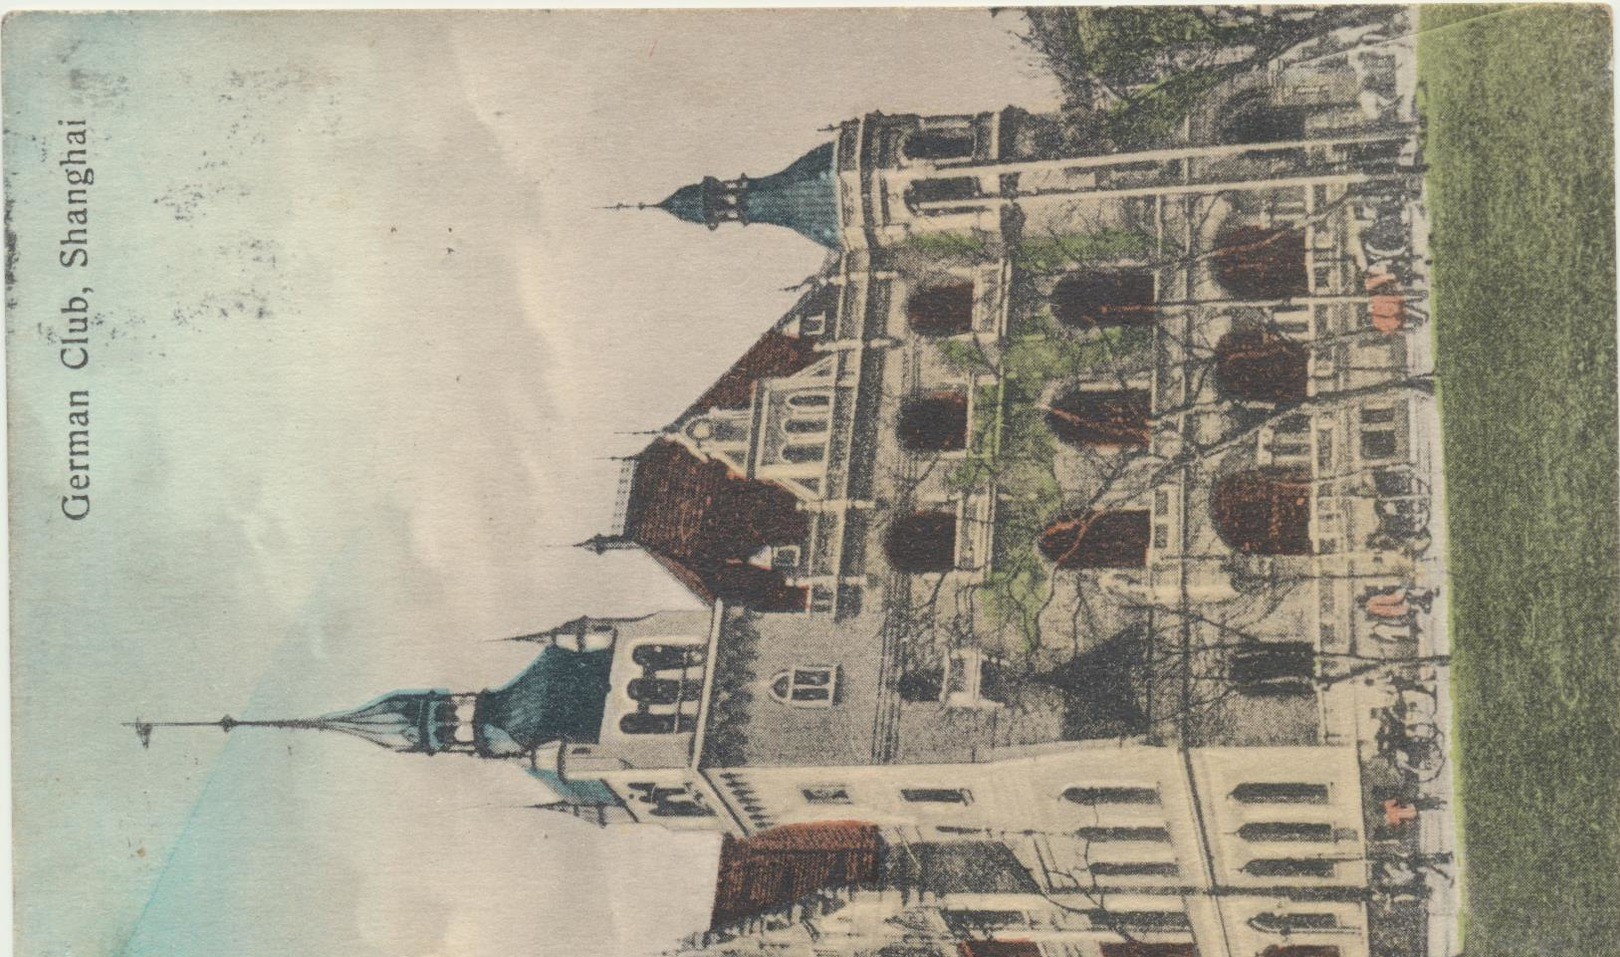

In [ ]:
front2 = Image.open('/content/Delcampe-6723-cut.jpg')
front2

In [ ]:
front1_hash = imagehash.dhash(front1)
print(front1_hash)

c3828282ca920ccc


In [ ]:
front2_hash = imagehash.dhash(front2)
print(front2_hash)

c3828282ca92184c


In [ ]:
print(front1_hash - front2_hash)

3


In [ ]:
back1 = Image.open('/content/Delcampe-6274.jpg')
back2 = Image.open('/content/Delcampe-6724-cut.jpg')

back1_hash = imagehash.dhash(back1)
back2_hash = imagehash.dhash(back2)

str(back1_hash), str(back2_hash)

('a7a3947599bbe3e0', 'a7a3b47599bae3e0')

In [ ]:
(back1_hash - back2_hash)  # hamming distance

2

# Delcampe

## Функции для скачивания и хеширования

In [ ]:
import requests

In [ ]:
yandex_base_url = 'https://storage.yandexcloud.net/postcards-open-sources/'

In [ ]:
def download_from_storage(front_id, back_id):
  front_url = yandex_base_url + str(front_id) + '.jpg'
  front_content = requests.get(front_url).content

  with open ('front_storage.jpg', 'wb') as front_file:
    front_file.write(front_content)

  back_url = yandex_base_url + str(back_id) + '.jpg'
  back_content = requests.get(back_url).content

  with open ('back_storage.jpg', 'wb') as back_file:
    back_file.write(back_content)

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
import re

In [ ]:
def download_from_delcampe(page_url):
  page = requests.get(page_url)
  if page.status_code != 200:
    return page.status_code
  soup = BeautifulSoup(page.content, 'html.parser')

  soup = soup.findAll(class_='slick-slide')
  front_url = soup[0].find('img')['src']
  front_url = re.sub('img_small', 'img_large', front_url)
  back_url = soup[1].find('img')['src']
  back_url = re.sub('img_small', 'img_large', back_url)

  front_content = requests.get(front_url).content
  back_content = requests.get(back_url).content

  with open ('front_delcampe.jpg', 'wb') as front_file:
    front_file.write(front_content)  

  with open ('back_delcampe.jpg', 'wb') as back_file:
    back_file.write(back_content)

  return page.status_code

In [ ]:
def hash_difference():
  front_delcampe = Image.open('front_delcampe.jpg')
  front_delcampe_hash = imagehash.dhash(front_delcampe)
  front_storage = Image.open('front_storage.jpg')
  front_storage_hash = imagehash.dhash(front_storage)
  # print(front_delcampe_hash, front_storage_hash)
  front_diff = front_delcampe_hash - front_storage_hash

  back_delcampe = Image.open('back_delcampe.jpg')
  back_delcampe_hash = imagehash.dhash(back_delcampe)
  back_storage = Image.open('back_storage.jpg')
  back_storage_hash = imagehash.dhash(back_storage)
  # print(back_delcampe_hash, back_storage_hash)
  back_diff = back_delcampe_hash - back_storage_hash

  return front_diff, back_diff

Пример

In [ ]:
page_url = 'https://www.delcampe.net/en_GB/collectables/postcards/china/61-320-china-shanghai-german-club-734644388.html'
front_id = 'Delcampe-6723'
back_id = 'Delcampe-6724'

download_from_delcampe(page_url)
download_from_storage(front_id, back_id)
get_hash_values()

('c3828282ca920ccc',
 'c3828282ca92184c',
 'a7a3947599bbe3e0',
 'a7a3b47599bae3e0')

## Подсчет хешей

In [ ]:
import pandas as pd

In [ ]:
postcards_data = pd.read_excel('/content/drive/MyDrive/Системный Блок/пишу тебе/Открытки Ebay.xlsx')
postcards_data.head()

Лицевая     Оборотная Передал для ЯП  \
0  Delcampe-1   Delcampe-2         В Базу   
1  Delcampe-3   Delcampe-4         В Базу   
2  Delcampe-5   Delcampe-6         В Базу   
3  Delcampe-7   Delcampe-8         В Базу   
4  Delcampe-9  Delcampe-10         В Базу   

                                              Ссылка Прошло модерацию  \
0  https://www.delcampe.net/en_GB/collectables/po...               Да   
1  https://www.delcampe.net/en_GB/collectables/po...               Да   
2  https://www.delcampe.net/en_GB/collectables/po...               Да   
3  https://www.delcampe.net/en_GB/collectables/po...               Да   
4  https://www.delcampe.net/en_GB/collectables/po...               Да   

      Проблема              Язык  \
0  Отсутствует  иностранный язык   
1  Отсутствует  иностранный язык   
2  Отсутствует  иностранный язык   
3  Отсутствует  иностранный язык   
4  Отсутствует  иностранный язык   

                                            s3 front  \
0  https://storage.yandexcloud.net/postcards-open...   
1  https://storage.yandexcloud.net/postcards-open...   
2  https://storage.yandexcloud.net/postcards-open...   
3  https://storage.yandexcloud.net/postcards-open...   
4  https://storage.yandexcloud.net/postcards-open...   

                                             s3 back Комментарий  \
0  https://storage.yandexcloud.net/postcards-open...         NaN   
1  https://storage.yandexcloud.net/postcards-open...         NaN   
2  https://storage.yandexcloud.net/postcards-open...         NaN   
3  https://storage.yandexcloud.net/postcards-open...         NaN   
4  https://storage.yandexcloud.net/postcards-open...         NaN   

  Id в основной таблице Unnamed: 11 Unnamed: 12  Unnamed: 13  Unnamed: 14  \
0                4335.0         NaN         NaN          NaN          NaN   
1                4336.0         NaN         NaN          NaN          NaN   
2                4337.0         NaN         NaN          NaN          NaN   
3                4338.0         NaN         NaN          NaN          NaN   
4                4339.0         NaN         NaN          NaN          NaN   

   Unnamed: 15  Unnamed: 16 Unnamed: 17  
0          NaN          NaN         NaN  
1          NaN          NaN         NaN  
2          NaN          NaN         NaN  
3          NaN          NaN         NaN  
4          NaN          NaN         NaN

In [ ]:
postcards_data = postcards_data[['Лицевая ', 'Оборотная', 'Ссылка', 's3 front', 's3 back']]
postcards_data = postcards_data.rename(columns={'Лицевая ': 'Лицевая'})
postcards_data.head()

Лицевая    Оборотная                                             Ссылка  \
0  Delcampe-1   Delcampe-2  https://www.delcampe.net/en_GB/collectables/po...   
1  Delcampe-3   Delcampe-4  https://www.delcampe.net/en_GB/collectables/po...   
2  Delcampe-5   Delcampe-6  https://www.delcampe.net/en_GB/collectables/po...   
3  Delcampe-7   Delcampe-8  https://www.delcampe.net/en_GB/collectables/po...   
4  Delcampe-9  Delcampe-10  https://www.delcampe.net/en_GB/collectables/po...   

                                            s3 front  \
0  https://storage.yandexcloud.net/postcards-open...   
1  https://storage.yandexcloud.net/postcards-open...   
2  https://storage.yandexcloud.net/postcards-open...   
3  https://storage.yandexcloud.net/postcards-open...   
4  https://storage.yandexcloud.net/postcards-open...   

                                             s3 back  
0  https://storage.yandexcloud.net/postcards-open...  
1  https://storage.yandexcloud.net/postcards-open...  
2  https://storage.yandexcloud.net/postcards-open...  
3  https://storage.yandexcloud.net/postcards-open...  
4  https://storage.yandexcloud.net/postcards-open...

In [ ]:
postcards_data.shape

(3964, 5)

Оставляем только строчки, где указаны все три ссылки

In [ ]:
postcards_data = postcards_data[(~postcards_data['Ссылка'].isna()) &
                                (~postcards_data['s3 front'].isna()) &
                                (~postcards_data['s3 back'].isna())]
postcards_data.shape

(1864, 5)

In [ ]:
from tqdm import tqdm

In [ ]:
front_diff_dict, back_diff_dict = dict(), dict()

In [ ]:
for ind, row in tqdm(postcards_data.iterrows(), total=postcards_data.shape[0]):
  if ind < 398:
    continue

  front_id, back_id = row['Лицевая'], row['Оборотная']
  page_url = row['Ссылка']

  try:
    delcampe_status_code = download_from_delcampe(page_url)
    if delcampe_status_code != 200:
      front_diff_dict[ind], back_diff_dict[ind] = 'dwnld_err', 'dwnld_err'
      continue
    download_from_storage(front_id, back_id)
    front_diff, back_diff = hash_difference()
    front_diff_dict[ind], back_diff_dict[ind] = front_diff, back_diff

  except:
    # raise
    print('error:', ind)
    print(front_id, back_id, page_url)
    print()

 58%|█████▊    | 1088/1864 [30:40<50:13,  3.88s/it]  

error: 1416
Delcampe-2881 Delcampe-2882 https://www.delcampe.net/en_GB/collectables/postcards/fine-nudes-adults/drawings/russia-imperial-tsarist-1910s-a-midsummer-nights-dream-rieger-1264962344.html



 62%|██████▏   | 1149/1864 [33:38<19:07,  1.60s/it]

error: 1654
Delcampe-3357 Delcampe-3358 https://www.delcampe.net/en_GB/collectables/postcards/children/children-and-family-groups/tsarist-russia-postcard-chita-post-stamp-1917-rural-children-big-wash-artist-kaulbach-1357008179.html



 71%|███████   | 1316/1864 [47:32<33:29,  3.67s/it]

error: 1948
Delcampe-3949 Delcampe-3950 https://www.delcampe.net/en_GB/collectables/postcards/russia/cpa-ak-nizhny-novgorod-vue-generale-du-kremlin-russia-402089-1332164005.html



100%|██████████| 1864/1864 [1:22:24<00:00,  2.65s/it]


In [ ]:
len(front_diff_dict), len(back_diff_dict)

(1860, 1860)

In [ ]:
diff_df = pd.DataFrame.from_dict(front_diff_dict, orient='index', 
                                 columns=['front_diff'])
diff_df['back_diff'] = back_diff_dict.values()
diff_df

front_diff  back_diff
0     dwnld_err  dwnld_err
1     dwnld_err  dwnld_err
2     dwnld_err  dwnld_err
3     dwnld_err  dwnld_err
4     dwnld_err  dwnld_err
...         ...        ...
3342  dwnld_err  dwnld_err
3343  dwnld_err  dwnld_err
3344  dwnld_err  dwnld_err
3345  dwnld_err  dwnld_err
3346  dwnld_err  dwnld_err

[1860 rows x 2 columns]

In [ ]:
diff_df.to_csv('diff_df.csv')

## Свод результатов

In [ ]:
diff_df = pd.read_csv('/content/drive/MyDrive/Системный Блок/пишу тебе/diff_df.csv', index_col=0)
diff_df.head()

front_diff  back_diff
0  dwnld_err  dwnld_err
1  dwnld_err  dwnld_err
2  dwnld_err  dwnld_err
3  dwnld_err  dwnld_err
4  dwnld_err  dwnld_err

In [ ]:
diff_df_0_397 = pd.read_csv('/content/drive/MyDrive/Системный Блок/пишу тебе/diff_df_0_397.csv', index_col=0)
diff_df_0_397.head()

front_diff  back_diff
0  dwnld_err  dwnld_err
1  dwnld_err  dwnld_err
2  dwnld_err  dwnld_err
3  dwnld_err  dwnld_err
4  dwnld_err  dwnld_err

In [ ]:
diff_df = diff_df_0_397.append(diff_df.tail(diff_df.shape[0] - 397))
diff_df.head()

front_diff  back_diff
0  dwnld_err  dwnld_err
1  dwnld_err  dwnld_err
2  dwnld_err  dwnld_err
3  dwnld_err  dwnld_err
4  dwnld_err  dwnld_err

In [ ]:
diff_df.shape

(1860, 2)

In [ ]:
postcards_data = postcards_data.join(diff_df)
postcards_data.head()

Лицевая    Оборотная                                             Ссылка  \
0  Delcampe-1   Delcampe-2  https://www.delcampe.net/en_GB/collectables/po...   
1  Delcampe-3   Delcampe-4  https://www.delcampe.net/en_GB/collectables/po...   
2  Delcampe-5   Delcampe-6  https://www.delcampe.net/en_GB/collectables/po...   
3  Delcampe-7   Delcampe-8  https://www.delcampe.net/en_GB/collectables/po...   
4  Delcampe-9  Delcampe-10  https://www.delcampe.net/en_GB/collectables/po...   

                                            s3 front  \
0  https://storage.yandexcloud.net/postcards-open...   
1  https://storage.yandexcloud.net/postcards-open...   
2  https://storage.yandexcloud.net/postcards-open...   
3  https://storage.yandexcloud.net/postcards-open...   
4  https://storage.yandexcloud.net/postcards-open...   

                                             s3 back front_diff  back_diff  
0  https://storage.yandexcloud.net/postcards-open...  dwnld_err  dwnld_err  
1  https://storage.yandexcloud.net/postcards-open...  dwnld_err  dwnld_err  
2  https://storage.yandexcloud.net/postcards-open...  dwnld_err  dwnld_err  
3  https://storage.yandexcloud.net/postcards-open...  dwnld_err  dwnld_err  
4  https://storage.yandexcloud.net/postcards-open...  dwnld_err  dwnld_err

In [ ]:
postcards_data.shape

(1864, 7)

In [ ]:
postcards_data['front_diff'].isna().sum()

4

In [ ]:
postcards_data['front_diff'].value_counts()

dwnld_err    774
2            220
1            177
3            165
0            107
4            101
5             44
7             36
6             33
8             27
12            21
10            21
11            20
9             19
13            17
15            11
16            10
17             9
14             8
19             7
30             4
23             4
28             3
18             3
27             3
21             3
20             3
24             2
38             1
31             1
29             1
36             1
25             1
35             1
26             1
22             1
Name: front_diff, dtype: int64

Выкидываем те, где dwnld_err, NaN

In [ ]:
postcards_data = postcards_data[
    (postcards_data['front_diff'] != 'dwnld_err') &
    (postcards_data['back_diff'] != 'dwnld_err') &
    (~postcards_data['front_diff'].isna())
    ]
postcards_data.shape

(1086, 7)

In [ ]:
postcards_data['front_diff'] = postcards_data['front_diff'].astype(int)
postcards_data['back_diff'] = postcards_data['back_diff'].astype(int)

## Анализ

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

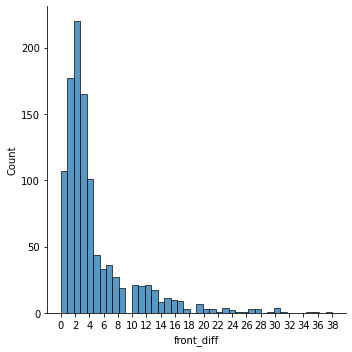

In [ ]:
sns.displot(postcards_data['front_diff']);
plt.xticks(range(0, 40, 2));

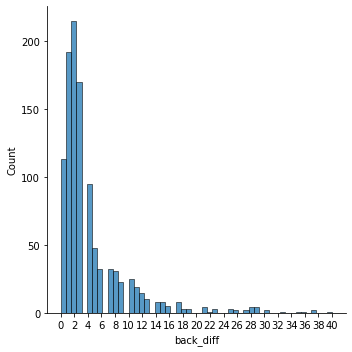

In [ ]:
sns.displot(postcards_data['back_diff']);
plt.xticks(range(0, 42, 2));

In [ ]:
postcards_data['s3 front'] = postcards_data['s3 front'] + '.jpg'
postcards_data['s3 back'] = postcards_data['s3 back'] + '.jpg'
postcards_data.to_csv('delcampe_hashes.csv', sep=';')

Разница > 30:

* поворот на 90 градусов (Delcampe-1005, -1006)
* сканы поменяны местами (1203, 1204) !
* первые два скана с сайта - не те же, что на диске (1469, 1470)
* значительно обрезаны поля (4003, 4004)
* обрезаны темные поля на скане стороны с текстом (6127, 6128)

Разница < 20, но больше 15:
* поля
* сканы поменяны местами (6445, 6446)

Вывод: (?)
* разница < 15 - дублирование
* разница от 15 до 40 - кандидат на дублирование
* разница > 40 - дублирование маловероятно (на Delcampe прецедентов нет)

# Auction

## Функции

In [ ]:
yandex_base_url = 'https://storage.yandexcloud.net/postcards-open-sources/'

In [ ]:
def download_from_storage(front_id, back_id):
  front_url = yandex_base_url + str(front_id) + '.jpg'
  front_content = requests.get(front_url).content

  with open ('front_storage.jpg', 'wb') as front_file:
    front_file.write(front_content)

  back_url = yandex_base_url + str(back_id) + '.jpg'
  back_content = requests.get(back_url).content

  with open ('back_storage.jpg', 'wb') as back_file:
    back_file.write(back_content)

In [ ]:
def download_from_auction(page_url):
  page = requests.get(page_url)
  if page.status_code != 200:
    return page.status_code
  soup = BeautifulSoup(page.content, 'html.parser')

  soup = soup.find('div', class_='fotorama').findAll('a')
  front_url = soup[0]['href']
  back_url = soup[1]['href']

  front_content = requests.get(front_url).content
  back_content = requests.get(back_url).content

  with open ('front_auction.jpg', 'wb') as front_file:
    front_file.write(front_content)  

  with open ('back_auction.jpg', 'wb') as back_file:
    back_file.write(back_content)

  return page.status_code

In [ ]:
def hash_difference():
  front_auction = Image.open('front_auction.jpg')
  front_auction_hash = imagehash.dhash(front_auction)
  front_storage = Image.open('front_storage.jpg')
  front_storage_hash = imagehash.dhash(front_storage)
  # print(front_delcampe_hash, front_storage_hash)
  front_diff = front_auction_hash - front_storage_hash

  back_auction = Image.open('back_auction.jpg')
  back_auction_hash = imagehash.dhash(back_auction)
  back_storage = Image.open('back_storage.jpg')
  back_storage_hash = imagehash.dhash(back_storage)
  # print(back_delcampe_hash, back_storage_hash)
  back_diff = back_auction_hash - back_storage_hash

  return front_diff, back_diff

## Расчет

In [ ]:
import pandas as pd

In [ ]:
xls = pd.ExcelFile('/content/drive/MyDrive/Системный Блок/пишу тебе/Открытки Ebay.xlsx')
postcards_data = pd.read_excel(xls, 'Auction')
postcards_data.head()

Лицевая     Оборотная Передал  \
0  Auction-001  Auction-002  В Базу   
1  Auction-003  Auction-004  В Базу   
2  Auction-005  Auction-006  В Базу   
3  Auction-007  Auction-008  В Базу   
4  Auction-009  Auction-010  В Базу   

                                              Ссылка Прошло модерацию  \
0  https://auction.ru/offer/kharkov_dramaticheski...               Да   
1  https://auction.ru/offer/kharkov_narodnyj_dom-...               Да   
2  https://auction.ru/offer/voronezh_zhenskaja_gi...               Да   
3  https://auction.ru/offer/saratov_gostinica_ros...               Да   
4  https://auction.ru/offer/tver_muzej_u_dvorca-i...               Да   

      Проблема        Язык                                           s3 front  \
0  Отсутствует     русский  https://storage.yandexcloud.net/postcards-open...   
1  Отсутствует     русский  https://storage.yandexcloud.net/postcards-open...   
2  Отсутствует     русский  https://storage.yandexcloud.net/postcards-open...   
3  Отсутствует  английский  https://storage.yandexcloud.net/postcards-open...   
4  Отсутствует     русский  https://storage.yandexcloud.net/postcards-open...   

                                             s3 back  \
0  https://storage.yandexcloud.net/postcards-open...   
1  https://storage.yandexcloud.net/postcards-open...   
2  https://storage.yandexcloud.net/postcards-open...   
3  https://storage.yandexcloud.net/postcards-open...   
4  https://storage.yandexcloud.net/postcards-open...   

                       Комментарий Id в основной таблице Unnamed: 11  \
0                              NaN                3102.0         NaN   
1                              NaN                3103.0         NaN   
2                              NaN                3104.0         NaN   
3  Из России в США (на английском)                3105.0         NaN   
4                              NaN                3106.0         NaN   

  Unnamed: 12  
0         NaN  
1         NaN  
2         NaN  
3         NaN  
4         NaN

In [ ]:
postcards_data = postcards_data[['Лицевая ', 'Оборотная', 'Ссылка', 's3 front', 's3 back']]
postcards_data = postcards_data.rename(columns={'Лицевая ': 'Лицевая'})
postcards_data.head()

Лицевая    Оборотная  \
0  Auction-001  Auction-002   
1  Auction-003  Auction-004   
2  Auction-005  Auction-006   
3  Auction-007  Auction-008   
4  Auction-009  Auction-010   

                                              Ссылка  \
0  https://auction.ru/offer/kharkov_dramaticheski...   
1  https://auction.ru/offer/kharkov_narodnyj_dom-...   
2  https://auction.ru/offer/voronezh_zhenskaja_gi...   
3  https://auction.ru/offer/saratov_gostinica_ros...   
4  https://auction.ru/offer/tver_muzej_u_dvorca-i...   

                                            s3 front  \
0  https://storage.yandexcloud.net/postcards-open...   
1  https://storage.yandexcloud.net/postcards-open...   
2  https://storage.yandexcloud.net/postcards-open...   
3  https://storage.yandexcloud.net/postcards-open...   
4  https://storage.yandexcloud.net/postcards-open...   

                                             s3 back  
0  https://storage.yandexcloud.net/postcards-open...  
1  https://storage.yandexcloud.net/postcards-open...  
2  https://storage.yandexcloud.net/postcards-open...  
3  https://storage.yandexcloud.net/postcards-open...  
4  https://storage.yandexcloud.net/postcards-open...

In [ ]:
postcards_data.shape

(3998, 5)

Оставляем только строчки, где указаны все три ссылки

In [ ]:
postcards_data = postcards_data[(~postcards_data['Ссылка'].isna()) &
                                (~postcards_data['s3 front'].isna()) &
                                (~postcards_data['s3 back'].isna())]
postcards_data.shape

(3289, 5)

In [ ]:
front_diff_dict, back_diff_dict = dict(), dict()

In [ ]:
def calculate(row):
  if row.name < 468:
    return 'dwnld_err', 'dwnld_err'
    
  front_id, back_id = row['Лицевая'], row['Оборотная']
  page_url = row['Ссылка']
  page_url = page_url.split('#')[0]

  try:
    auction_status_code = download_from_auction(page_url)
    if auction_status_code != 200:
      return 'dwnld_err', 'dwnld_err'
    download_from_storage(front_id, back_id)
    front_diff, back_diff = hash_difference()
    return front_diff, back_diff

  except:
    # raise
    print('error:', front_id, back_id, page_url)
    print()
    return 'error_other', 'error_other'

In [ ]:
from tqdm import tqdm
tqdm.pandas()

In [ ]:
postcards_data['calc_res'] = postcards_data.progress_apply(calculate, axis=1)

 46%|████▌     | 1501/3289 [51:34<1:08:48,  2.31s/it]

error: Auction-3053 Auction-3054 https://auction.ru/offer/antikvarnaja_otkrytka_volga_u_molodeckogo_kurgana_lodka_rybolovy_glebovo_jaroslavskoj_gubernii-i214773729325512.html



 91%|█████████▏| 3004/3289 [2:58:11<20:50,  4.39s/it]

error: Auction-6065 Auction-6066 https://auction.ru/offer/dorevoljucionnaja_otkrytka_kronshtadt_andreevskij_sobor_1914_god-i194100435198486.html



100%|██████████| 3289/3289 [3:24:25<00:00,  3.73s/it]


In [ ]:
postcards_data.to_csv('auction_hashes.csv')

## Анализ

In [ ]:
import ast

In [ ]:
postcards_data = pd.read_csv('/content/drive/MyDrive/Системный Блок/пишу тебе/auction_hashes.csv',
                             index_col=0)
postcards_data['calc_res'] = postcards_data['calc_res'].apply(ast.literal_eval)
postcards_data['front_diff'] = postcards_data['calc_res'].apply(
    lambda x: x[0]
)
postcards_data['back_diff'] = postcards_data['calc_res'].apply(
    lambda x: x[1]
)
postcards_data.head()

Лицевая    Оборотная  \
0  Auction-001  Auction-002   
1  Auction-003  Auction-004   
2  Auction-005  Auction-006   
3  Auction-007  Auction-008   
4  Auction-009  Auction-010   

                                              Ссылка  \
0  https://auction.ru/offer/kharkov_dramaticheski...   
1  https://auction.ru/offer/kharkov_narodnyj_dom-...   
2  https://auction.ru/offer/voronezh_zhenskaja_gi...   
3  https://auction.ru/offer/saratov_gostinica_ros...   
4  https://auction.ru/offer/tver_muzej_u_dvorca-i...   

                                            s3 front  \
0  https://storage.yandexcloud.net/postcards-open...   
1  https://storage.yandexcloud.net/postcards-open...   
2  https://storage.yandexcloud.net/postcards-open...   
3  https://storage.yandexcloud.net/postcards-open...   
4  https://storage.yandexcloud.net/postcards-open...   

                                             s3 back                calc_res  \
0  https://storage.yandexcloud.net/postcards-open...  (dwnld_err, dwnld_err)   
1  https://storage.yandexcloud.net/postcards-open...  (dwnld_err, dwnld_err)   
2  https://storage.yandexcloud.net/postcards-open...  (dwnld_err, dwnld_err)   
3  https://storage.yandexcloud.net/postcards-open...  (dwnld_err, dwnld_err)   
4  https://storage.yandexcloud.net/postcards-open...  (dwnld_err, dwnld_err)   

  front_diff  back_diff  
0  dwnld_err  dwnld_err  
1  dwnld_err  dwnld_err  
2  dwnld_err  dwnld_err  
3  dwnld_err  dwnld_err  
4  dwnld_err  dwnld_err

In [ ]:
postcards_data.shape

(3289, 8)

In [ ]:
postcards_data = postcards_data[
    (postcards_data['front_diff'] != 'dwnld_err') &
    (postcards_data['front_diff'] != 'error_other')
]
postcards_data.shape

(2184, 8)

In [ ]:
postcards_data['front_diff'] = postcards_data['front_diff'].astype(int)
postcards_data['back_diff'] = postcards_data['back_diff'].astype(int)

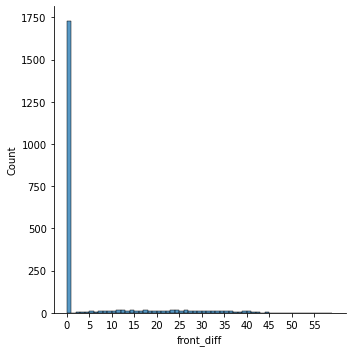

In [ ]:
sns.displot(postcards_data['front_diff'], bins=range(0, 60, 1));
plt.xticks(range(0, 60, 5));

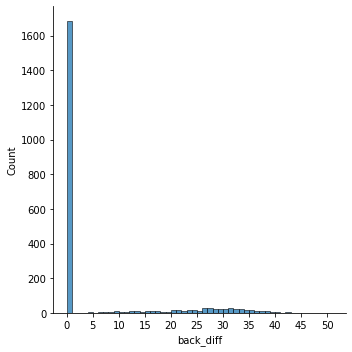

In [ ]:
sns.displot(postcards_data['back_diff'], bins=range(0, 52, 1));
plt.xticks(range(0, 52, 5));

In [ ]:
postcards_data.to_csv('auction_hashes.csv')